### Importing liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

from warnings import filterwarnings
filterwarnings('ignore')

### Loading Data

In [2]:
customer=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Customers.csv')
print(customer.shape)
customer.head()

(200, 4)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
products=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Products.csv')
print(products.shape)
products.head()

(100, 4)


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
transactions=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Transactions.csv')
print(transactions.shape)
transactions.head()

(1000, 7)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Data Preparation

In [5]:
#Merging all three data
data=pd.merge(customer,transactions,how='inner',on='CustomerID')
data.rename(columns={'Price':'transaction_price'},inplace=True)
data=pd.merge(data,products,how='inner',on='ProductID')
data.rename(columns={'Price':'product_price'},inplace=True)
data.head()


,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,transaction_price,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.6,57.3,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.9,57.3,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.9,57.3,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3,171.9,57.3,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3,171.9,57.3,SoundWave Cookbook,Books,57.3


In [6]:
# droping  transaction_price
data.drop('transaction_price',axis=1,inplace=True)
data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.6,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.9,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.9,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3,171.9,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3,171.9,SoundWave Cookbook,Books,57.3


In [7]:
data.shape

(1000, 12)

In [8]:
customer_data=data.copy()

In [9]:
customer_features = customer_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend
    'Region': lambda x: x.mode()[0],# Region
    'Category': lambda x: x.mode()[0],  # Most common category
    'ProductID': 'count'  # Total products purchased
}).reset_index()
customer_features.head()

,CustomerID,TotalValue,Region,Category,ProductID
0,C0001,3354.52,South America,Electronics,5
1,C0002,1862.74,Asia,Clothing,4
2,C0003,2725.38,South America,Home Decor,4
3,C0004,5354.88,South America,Books,8
4,C0005,2034.24,Asia,Electronics,3


In [10]:
print('Number of Rows : ',customer_features.shape[0])
print('Number of Columns : ',customer_features.shape[1])

Number of Rows :  199
Number of Columns :  5


In [11]:
# Checking Null values
customer_features.isnull().sum()

CustomerID    0
TotalValue    0
Region        0
Category      0
ProductID     0
dtype: int64

<Axes: >

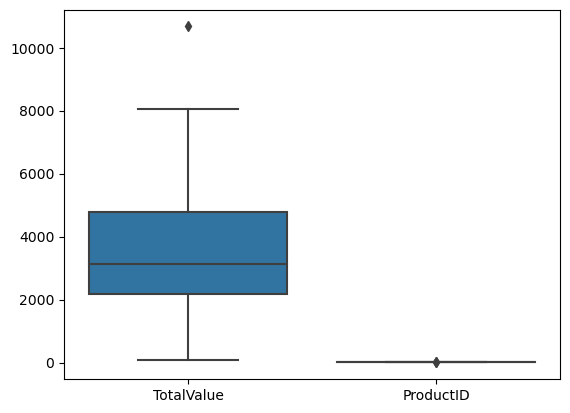

In [12]:
#checking outliers
sns.boxplot(customer_features)

### Feature Engineering

In [13]:
data.Category.unique()

array(['Books', 'Home Decor', 'Electronics', 'Clothing'], dtype=object)

In [14]:
data.Region.unique()

array(['South America', 'Europe', 'North America', 'Asia'], dtype=object)

In [15]:
regions={'South America':0, 'Europe':1, 'North America': 3, 'Asia': 4}
categories={'Books':1 ,'Home Decor' : 1,'Electronics':2,'Clothing':3}
x=customer_features['Category'].map(categories)
y=customer_features['Region'].map(regions)

In [16]:
customer_features['Region']=y
customer_features['Category']=x
customer_features.head()

,CustomerID,TotalValue,Region,Category,ProductID
0,C0001,3354.52,0,2,5
1,C0002,1862.74,4,3,4
2,C0003,2725.38,0,1,4
3,C0004,5354.88,0,1,8
4,C0005,2034.24,4,2,3


### Clustering

In [43]:
data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.6,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.9,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.9,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3,171.9,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3,171.9,SoundWave Cookbook,Books,57.3


In [44]:
customer_features.head()

,CustomerID,TotalValue,Region,Category,ProductID
0,C0001,3354.52,0,2,5
1,C0002,1862.74,4,3,4
2,C0003,2725.38,0,1,4
3,C0004,5354.88,0,1,8
4,C0005,2034.24,4,2,3


In [45]:
customer_features.shape

(199, 5)

<Axes: >

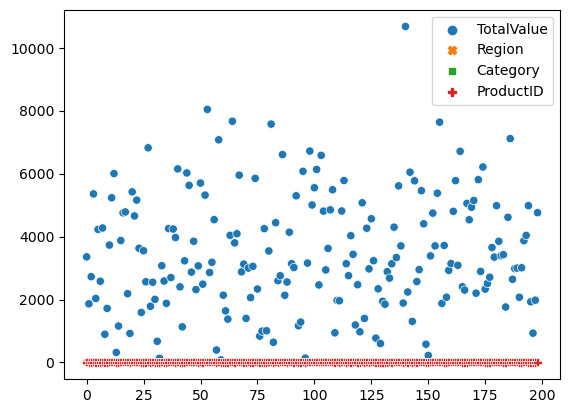

In [49]:
sns.scatterplot(customer_features)

In [54]:
features=customer_features.drop('Region',axis=1)
target=customer_features.Region
target

0      0
1      4
2      0
3      0
4      4
      ..
194    1
195    1
196    1
197    1
198    4
Name: Region, Length: 199, dtype: int64

In [64]:
features.drop('CustomerID',axis=1,inplace=True)


KeyError: "['CustomerID'] not found in axis"

In [68]:
from sklearn.preprocessing import StandardScaler
features=StandardScaler().fit_transform(features)
features

array([[-0.06170143,  0.3927785 , -0.01145819],
       [-0.87774353,  1.61407416, -0.46749414],
       [-0.40585722, -0.82851716, -0.46749414],
       [ 1.03254704, -0.82851716,  1.35664965],
       [-0.78392861,  0.3927785 , -0.92353008],
       [ 0.41587942, -0.82851716, -0.46749414],
       [-0.48548229,  0.3927785 , -0.92353008],
       [ 0.43997044, -0.82851716,  2.26872154],
       [-1.40630171,  1.61407416, -0.92353008],
       [-0.9571662 ,  1.61407416, -0.46749414],
       [ 0.14369581, -0.82851716, -0.01145819],
       [ 0.96492372, -0.82851716,  0.9006137 ],
       [ 1.38575064,  1.61407416,  0.9006137 ],
       [-1.72239508, -0.82851716, -1.83560198],
       [-1.26353893, -0.82851716, -1.37956603],
       [ 0.22269727,  1.61407416, -0.01145819],
       [ 0.70375173, -0.82851716,  1.35664965],
       [ 0.71908486, -0.82851716, -0.01145819],
       [-0.70101045, -0.82851716,  0.44457776],
       [-1.39212827,  0.3927785 , -1.83560198],
       [ 1.0681256 , -0.82851716,  1.356

In [69]:
from sklearn.manifold import TSNE
tsne=TSNE(learning_rate=200,n_components=2)
x_tsne=tsne.fit_transform(features)
x_tsne

array([[  2.2427404 ,  -5.075135  ],
       [  9.770467  ,  -7.0700655 ],
       [-11.414979  ,   2.9212728 ],
       [ -0.641332  ,   6.2182813 ],
       [  2.9996738 ,  -9.062798  ],
       [ -7.086561  ,   2.0344725 ],
       [  2.4046931 ,  -8.63767   ],
       [ -1.3570439 ,   8.019142  ],
       [  9.314431  ,  -9.049515  ],
       [ 10.062595  ,  -7.4670806 ],
       [ -7.3877344 ,   4.015116  ],
       [ -1.6527866 ,   5.2325635 ],
       [  7.531323  ,  -0.27947047],
       [-17.288374  ,   0.14097486],
       [-16.113934  ,   0.6500627 ],
       [  9.447297  ,  -3.476448  ],
       [ -1.515705  ,   6.648631  ],
       [ -5.0060215 ,   2.963171  ],
       [ -9.170341  ,   6.617289  ],
       [  4.5551915 , -10.73054   ],
       [ -0.531351  ,   6.146796  ],
       [  8.551366  ,  -1.9809529 ],
       [ -2.9343803 ,   3.894155  ],
       [ -4.536517  ,   6.9632535 ],
       [-14.253876  ,   3.1315231 ],
       [  1.6934402 ,  -6.643226  ],
       [-11.863005  ,   2.885548  ],
 

<Axes: >

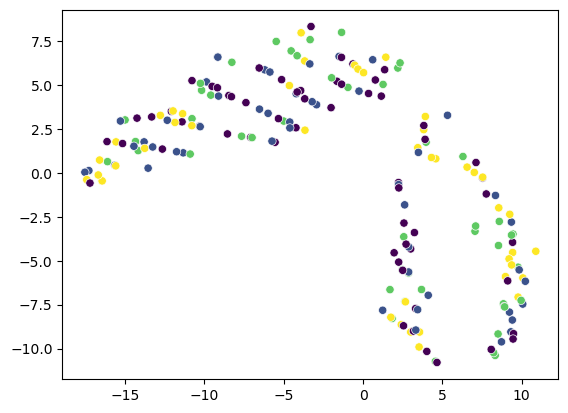

In [70]:
sns.scatterplot(x=x_tsne[:,0],y=x_tsne[:,1],c=target)

In [71]:
from sklearn.cluster import KMeans
filterwarnings('ignore')
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(x_tsne,target)
    wcss.append(kmean.inertia_)
print(wcss) 

[18946.35546875, 6054.66796875, 3202.30224609375, 2338.499755859375, 1718.552490234375, 1218.164794921875, 978.9151000976562, 799.4202270507812, 679.3302001953125, 588.6522827148438]


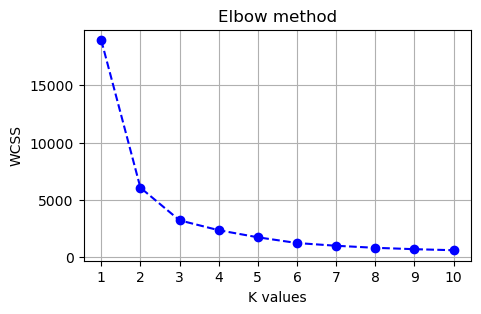

In [72]:
plt.figure(figsize=(5,3))
plt.grid()
plt.plot(range(1,11),wcss,linestyle='--',marker='o',color='b')
plt.xticks(range(1,11))
plt.xlabel('K values')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()

In [73]:
kmean=KMeans(n_clusters=10)
kmean.fit(x_tsne,target)

KMeans(n_clusters=10)

In [74]:
from sklearn.preprocessing import StandardScaler

df=customer_features.copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['TotalValue', 'Region', 'Category', 'ProductID']])


In [75]:
scaled_data

array([[-0.06170143, -1.15143759,  0.3927785 , -0.01145819],
       [-0.87774353,  1.36654131,  1.61407416, -0.46749414],
       [-0.40585722, -1.15143759, -0.82851716, -0.46749414],
       [ 1.03254704, -1.15143759, -0.82851716,  1.35664965],
       [-0.78392861,  1.36654131,  0.3927785 , -0.92353008],
       [ 0.41587942, -1.15143759, -0.82851716, -0.46749414],
       [-0.48548229,  1.36654131,  0.3927785 , -0.92353008],
       [ 0.43997044,  0.73704659, -0.82851716,  2.26872154],
       [-1.40630171, -0.52194286,  1.61407416, -0.92353008],
       [-0.9571662 , -0.52194286,  1.61407416, -0.46749414],
       [ 0.14369581, -1.15143759, -0.82851716, -0.01145819],
       [ 0.96492372, -1.15143759, -0.82851716,  0.9006137 ],
       [ 1.38575064, -1.15143759,  1.61407416,  0.9006137 ],
       [-1.72239508, -0.52194286, -0.82851716, -1.83560198],
       [-1.26353893,  0.73704659, -0.82851716, -1.37956603],
       [ 0.22269727,  0.73704659,  1.61407416, -0.01145819],
       [ 0.70375173, -0.

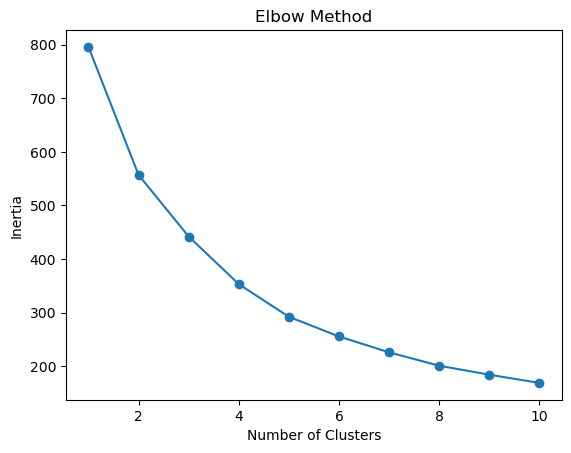

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [77]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters


In [80]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=10)
df['Cluster'] = hierarchical.fit_predict(scaled_data)


In [81]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


          TotalValue    Region  Category  ProductID
Cluster                                            
0        6175.258571  3.476190  1.761905   8.571429
1        2361.610690  0.448276  2.448276   4.137931
2        2198.256471  3.352941  2.176471   3.235294
3        1669.890500  0.500000  1.100000   2.700000
4        3085.800000  3.473684  3.000000   5.000000
5        3398.870000  3.409091  1.000000   5.272727
6        3839.996061  0.515152  1.000000   5.151515
7        1217.175833  3.666667  1.000000   2.166667
8        5701.544375  0.250000  1.125000   7.687500
9        5510.422000  0.500000  2.500000   6.100000


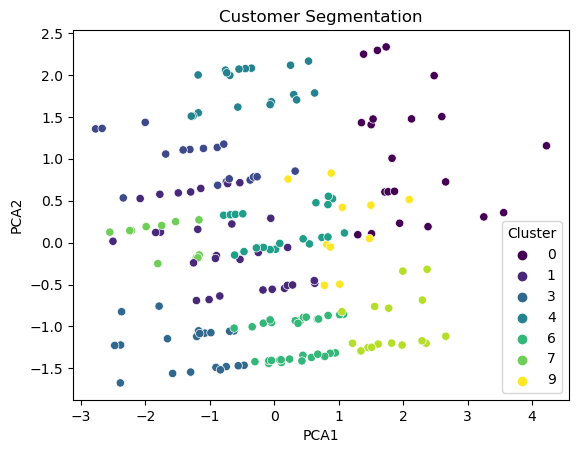

In [82]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.show()
